#### Magic initialisation stuff

* Initialises a database connection semi-securely
* References a plotting library

In [36]:
using System.IO;
var connectionString = await File.ReadAllTextAsync("C:\\\\Temp\\BestFunds.txt");
#r "nuget: Microsoft.DotNet.Interactive.SqlServer, *-*"
#!connect mssql --kernel-name BestFunds @csharp:connectionString
#r "nuget:ScottPlot, 5.0.*"

Error: ScottPlot version 5.0.* cannot be added because version 5.0.55 was added previously.

#### Querying our database

This query sums the value of every transaction made by a person with the given name.

In [52]:
#!set --name personName --value @input:"Enter a person's name"

DECLARE @Income DECIMAL
SELECT @Income = SUM(Amount)
FROM Transactions
WHERE PersonName = @personName AND TransactionType = 'income'

DECLARE @Outgoing DECIMAL
SELECT @Outgoing = SUM(Amount)
FROM Transactions
WHERE PersonName = @personName AND TransactionType = 'expense'

SELECT @Income - @Outgoing AS Balance

Adding shared variable declaration statement : DECLARE @personName NVarChar(12) = N'Aaron Taylor';

(1 row affected)

Balance
-23977


#### Drawing some graphs

Here are some sample graphs


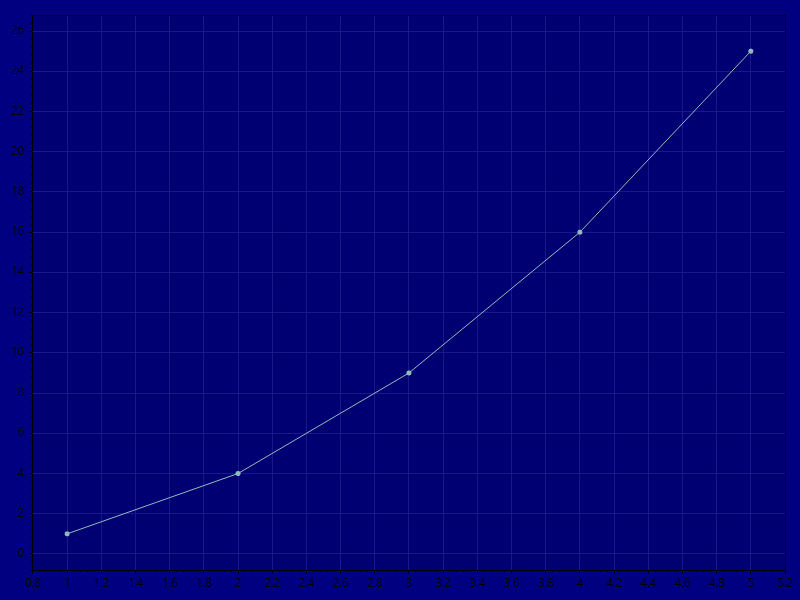

In [53]:
// https://scottplot.net/quickstart/notebook/

using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(800, 600)), HtmlFormatter.MimeType);

// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plot = new();
plot.FigureBackground.Color = Colors.Navy;
plot.DataBackground.Color = Colors.Navy.Darken(0.1);
plot.Grid.MajorLineColor = Colors.Navy.Lighten(0.1);
plot.Add.Palette = new ScottPlot.Palettes.Frost();
plot.Add.Scatter(dataX, dataY);

// display the plot
plot




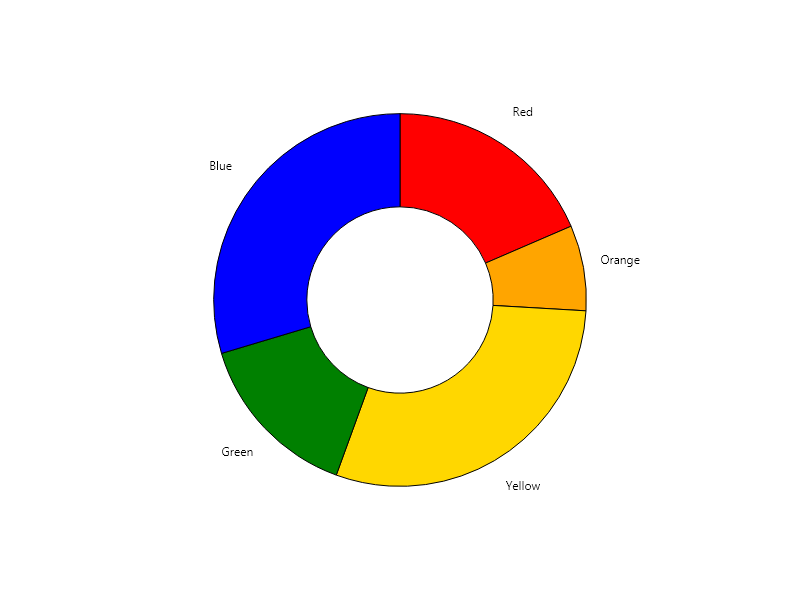

In [54]:
ScottPlot.Plot myPlot = new();

List<PieSlice> slices = new()
{
    new PieSlice() { Value = 5, FillColor = Colors.Red, Label = "Red" },
    new PieSlice() { Value = 2, FillColor = Colors.Orange, Label = "Orange" },
    new PieSlice() { Value = 8, FillColor = Colors.Gold, Label = "Yellow" },
    new PieSlice() { Value = 4, FillColor = Colors.Green, Label = "Green" },
    new PieSlice() { Value = 8, FillColor = Colors.Blue, Label = "Blue" },
};

var pie = myPlot.Add.Pie(slices);
pie.DonutFraction = .5;

myPlot.ShowLegend();

// hide unnecessary plot components
myPlot.Axes.Frameless();
myPlot.HideGrid();

myPlot